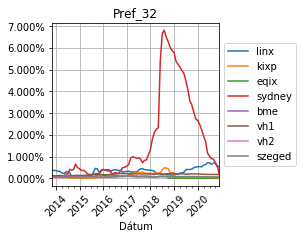

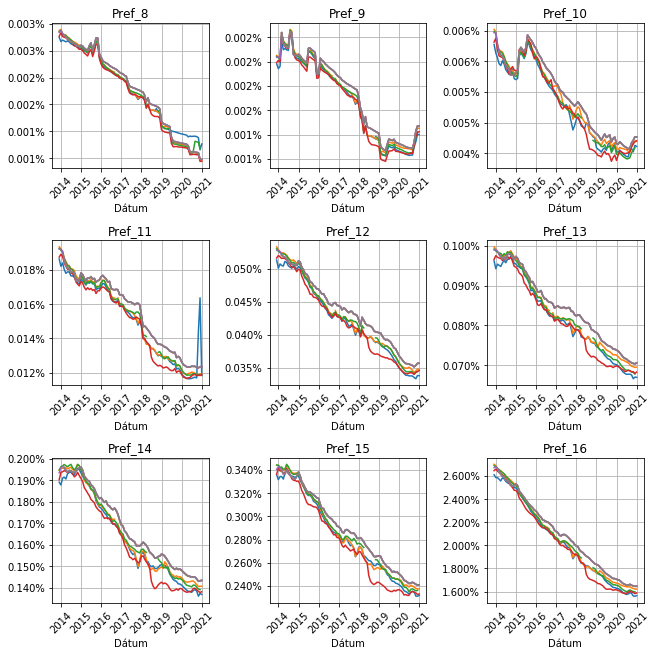

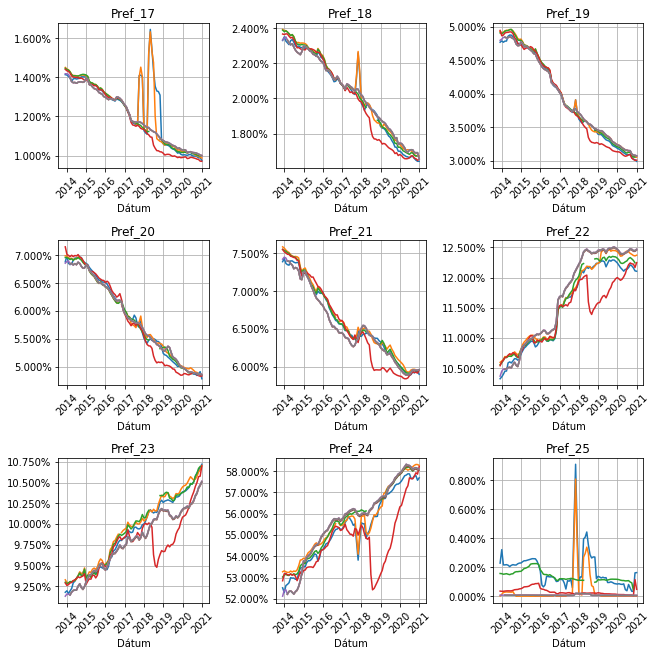

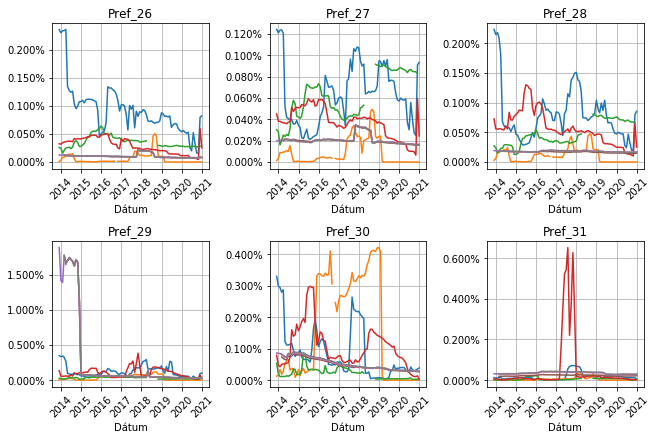

In [6]:
import plotly.express as px
import pandas as pd
import numpy as np
import os 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# D:/TomiKJ/Git Hub/IP-stats-trends/venv/csv/
# D:/Users/Baki/Documents/GitHub/IP-stats-trends/venv/csv/
location ='D:/Users/Baki/Documents/GitHub/IP-stats-trends/venv/csv/'
bme = pd.read_csv(location+"bme.csv",parse_dates=["Date"], index_col="Date")
vh1 = pd.read_csv(location+"vh1.csv",parse_dates=["Date"], index_col="Date")
vh2 = pd.read_csv(location+"vh2.csv",parse_dates=["Date"], index_col="Date")
sze = pd.read_csv(location+"szeged.csv",parse_dates=["Date"], index_col="Date")
lin = pd.read_csv(location+"linx.csv",parse_dates=["Date"], index_col="Date")
kix = pd.read_csv(location+"kixp.csv",parse_dates=["Date"], index_col="Date")
eqi = pd.read_csv(location+"eqix.csv",parse_dates=["Date"], index_col="Date")
syd = pd.read_csv(location+"sydney.csv",parse_dates=["Date"], index_col="Date")

for i in range(32):
    col='Pref_'+str(i+1)
    bme[col] = bme[col]/bme["Total_count"]
    vh1[col] = vh1[col]/vh1["Total_count"]
    vh2[col] = vh2[col]/vh2["Total_count"]
    sze[col] = sze[col]/sze["Total_count"]
    lin[col] = lin[col]/lin["Total_count"]
    kix[col] = kix[col]/kix["Total_count"]
    eqi[col] = eqi[col]/eqi["Total_count"]
    syd[col] = syd[col]/syd["Total_count"]



c=8
legend=('linx','kixp','eqix','sydney','bme','vh1','vh2','szeged')
Index = list(set(list(bme.index) + list(vh1.index )+ list(vh2.index) + list(sze.index) +list(lin.index) + list(kix.index )+ list(eqi.index) + list(syd.index)))
Index.sort()

df4 = pd.DataFrame({'linx': [lin.loc[Date, 'Pref_32'] if Date in lin.index else np.nan for Date in Index],
                    'kixp': [kix.loc[Date, 'Pref_32'] if Date in kix.index else np.nan for Date in Index],
                    'eqix': [eqi.loc[Date, 'Pref_32'] if Date in eqi.index else np.nan for Date in Index],
                    'sydney': [syd.loc[Date, 'Pref_32'] if Date in syd.index else np.nan for Date in Index],
                    'bme': [bme.loc[Date, 'Pref_32'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'Pref_32'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'Pref_32'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'Pref_32'] if Date in sze.index else np.nan for Date in Index],
                   },index = Index)

plot = df4.resample('M').mean().plot(figsize=(3,3))
plot.set_title('Pref_32')
plot.set(xlabel='Dátum')
vals = plot.get_yticks()
plot.set_yticklabels(['{:,.3%}'.format(x) for x in vals])
plot.tick_params(axis='x',labelrotation=45)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot.grid()

    
bme_pref = bme.copy()
for col in bme_pref.columns: 
    if "Pref" not in col:
        #print(col)        
        bme_pref.drop(columns=[col],inplace=True)
        

fig, axs = plt.subplots(3, 3,figsize=(9,9),constrained_layout=True)
for i in range(3):
    for j in range(3):
        col='Pref_'+str(c)
        
        df4 = pd.DataFrame({'linx': [lin.loc[Date, col] if Date in lin.index else np.nan for Date in Index],
                            'kixp': [kix.loc[Date, col] if Date in kix.index else np.nan for Date in Index],
                            'eqix': [eqi.loc[Date, col] if Date in eqi.index else np.nan for Date in Index],
                            'sydney': [syd.loc[Date, col] if Date in syd.index else np.nan for Date in Index],
                            'bme': [bme.loc[Date, col] if Date in bme.index else np.nan for Date in Index],
                            'vh1': [vh1.loc[Date, col] if Date in vh1.index else np.nan for Date in Index],
                            'vh2': [vh2.loc[Date, col] if Date in vh2.index else np.nan for Date in Index],
                            'szeged': [sze.loc[Date, col] if Date in sze.index else np.nan for Date in Index],
                           },index = Index)
        
        axs[i,j].plot(df4.resample('M').mean())
        axs[i,j].set_title(col)
#         axs[i,j].legend(legend,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        c+=1
for ax in axs.flat:
    ax.set(xlabel='Dátum')
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.3%}'.format(x) for x in vals])
    ax.tick_params(axis='x',labelrotation=45)
#     ax.margins(0)
    ax.grid()

    
fig, axs = plt.subplots(3, 3,figsize=(9,9), constrained_layout=True)
for i in range(3):
    for j in range(3):
        col='Pref_'+str(c)
        
        df4 = pd.DataFrame({'linx': [lin.loc[Date, col] if Date in lin.index else np.nan for Date in Index],
                            'kixp': [kix.loc[Date, col] if Date in kix.index else np.nan for Date in Index],
                            'eqix': [eqi.loc[Date, col] if Date in eqi.index else np.nan for Date in Index],
                            'sydney': [syd.loc[Date, col] if Date in syd.index else np.nan for Date in Index],
                            'bme': [bme.loc[Date, col] if Date in bme.index else np.nan for Date in Index],
                            'vh1': [vh1.loc[Date, col] if Date in vh1.index else np.nan for Date in Index],
                            'vh2': [vh2.loc[Date, col] if Date in vh2.index else np.nan for Date in Index],
                            'szeged': [sze.loc[Date, col] if Date in sze.index else np.nan for Date in Index],
                           },index = Index)
        
        axs[i,j].plot(df4.resample('M').mean())
        axs[i,j].set_title(col)
#         axs[i,j].legend(legend)
        c+=1
for ax in axs.flat:
    ax.set(xlabel='Dátum')
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.3%}'.format(x) for x in vals])
    ax.tick_params(axis='x',labelrotation=45)
#     ax.margins(0)
    ax.grid()

    
fig, axs = plt.subplots(2, 3,figsize=(9,6), constrained_layout=True)
for i in range(2):
    for j in range(3):
        col='Pref_'+str(c)
        
        df4 = pd.DataFrame({'linx': [lin.loc[Date, col] if Date in lin.index else np.nan for Date in Index],
                            'kixp': [kix.loc[Date, col] if Date in kix.index else np.nan for Date in Index],
                            'eqix': [eqi.loc[Date, col] if Date in eqi.index else np.nan for Date in Index],
                            'sydney': [syd.loc[Date, col] if Date in syd.index else np.nan for Date in Index],
                            'bme': [bme.loc[Date, col] if Date in bme.index else np.nan for Date in Index],
                            'vh1': [vh1.loc[Date, col] if Date in vh1.index else np.nan for Date in Index],
                            'vh2': [vh2.loc[Date, col] if Date in vh2.index else np.nan for Date in Index],
                            'szeged': [sze.loc[Date, col] if Date in sze.index else np.nan for Date in Index],
                           },index = Index)
        
        axs[i,j].plot(df4.resample('M').mean())
        axs[i,j].set_title(col)
#         axs[i,j].legend(legend)
        c+=1
for ax in axs.flat:
    ax.set(xlabel='Dátum')
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.3%}'.format(x) for x in vals])
    ax.tick_params(axis='x',labelrotation=45)
#     ax.margins(0)
    ax.grid()
